## Problem Set for Lecture I: Fourier Analysis

Bryan Scott, CIERA/Northwestern

DSFP Session 20: Time Series Methods in Astronomy

Adapted and Expanded from Exercises Originally given by L. Bugnet (Flatiron Institute) at Session 13 of the Data Science Fellowship Program 

version 0.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1: Fourier Series for discontinuous functions 

## Problem 1: Use the formula defining the Fourier Series to write down a series approximation to the square wave defined by:

$$
f(t) \begin{cases} 
      +1 & 0 \leq x\leq \pi \\
      0 & \pi \leq x\leq 2\pi \\
   \end{cases}
$$

### Part A) Show that the Fourier Series expansion for this function is given by:

$$
F(t) = 1/2 + \Sigma_{n=1}^{\infty} \left( \frac{sin n\pi}{n \pi} cos(n t) + \frac{sin n\pi}{n \pi} sin(n t) \right)
$$

by computing the integrals for $a_n$, $b_n$, and $a_0$.

### Part B) Now write a function to plot the Fourier Series expressions for different numbers of sine and cosine functions.  

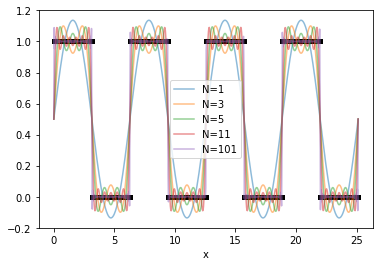

In [96]:
#Plot f over 3T-wide intervals:
x1=np.linspace(0, np.pi, 100)
x2=np.linspace(np.pi, 2*np.pi, 100)

plt.figure()
for ii in range(0,4):
    plt.plot(x1+2*np.pi*ii, np.ones(len(x1)), color='k', lw=5)
    plt.plot(x2+2*np.pi*ii, np.zeros(len(x2)), color='k', lw=5)
    
#Overplot Fourier Serie F:
x = np.linspace(0, 8*np.pi, 800)
a0=1./2.
Na = [ 1, 3, 5, 11, 101] #number of sine function to consider in the Fourier Serie

#Fucntion that calculates F from a0, an, bn:
def f_N(x,N, a0):
    na = range(1,N+1,2)
    f_N = np.zeros(x.shape)+a0
    for n in na:
        an = np.sin(n*np.pi)/(n*np.pi)
        bn = (1-np.cos(n*np.pi))/(n*np.pi)
        f_N += an*np.cos(n*x) + bn*np.sin(n*x)
    return f_N
    
    
for N in Na:
    plt.plot(x,f_N(x,N, a0),label='N={}'.format(N), alpha=0.5)
plt.xlabel('x')
plt.legend(loc='best')

## Part 2: Repeat the above for the triangle wave that I showed in my lecture and replicate my plots

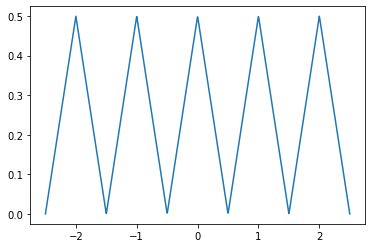

In [95]:
x = np.linspace(-2.5, 2.5, 1000)
plt.plot(x, np.piecewise(x, [((x+0.5)%1 - 0.5 <= 0) * ((x+0.5)%1 - 0.5 >= -1/2), ((x+0.5)%1 - 0.5 >= 0) * ((x+0.5)%1 - 0.5 <= 1/2)], [lambda x: ((x+1) % 1 - 1) + 1/2, lambda x: 1/2 - (x+1)%1]))

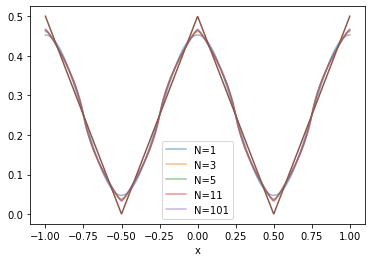

In [139]:
#Plot f over 3T-wide intervals:
# x1=np.linspace(-, 100)
# x2=np.linspace(-.25, 2.5, 100)

# plt.figure()
# for ii in range(0,4):
#     plt.plot(x1+2*np.pi*ii, np.ones(len(x1)), color='k', lw=5)
#     plt.plot(x2+2*np.pi*ii, np.zeros(len(x2)), color='k', lw=5)
    
#Overplot Fourier Serie F:
x = np.linspace(-1, 1, 1000)
a0=1./4
Na = [ 1, 3, 5, 11, 101] #number of sine function to consider in the Fourier Serie

#Fucntion that calculates F from a0, an, bn:
def f_N(x,N, a0):
    na = range(1,N+1,2)
    f_N = np.zeros(x.shape)+a0
    for n in na:
        an = 2/ (np.pi * (2*n - 1))**2
        f_N += an*np.cos((2*np.pi*(2*n-1))*x) 
    return f_N
    
    
for N in Na:
    plt.plot(x,f_N(x,N, a0),label='N={}'.format(N), alpha=0.5)
plt.xlabel('x')
plt.legend(loc='best')

plt.plot(x, np.piecewise(x, [((x+0.5)%1 - 0.5 <= 0) * ((x+0.5)%1 - 0.5 >= -1/2), ((x+0.5)%1 - 0.5 >= 0) * ((x+0.5)%1 - 0.5 <= 1/2)], [lambda x: ((x+1) % 1 - 1) + 1/2, lambda x: 1/2 - (x+1)%1]))

## Part 3: What do you notice about the behavior of the approximations you just derived? Why do you think this happens?

Hint: Take the derivatives of the two functions. What differs between them? We'll come back to this in the afternoon session. 

# Problem 2: Fourier Transforms of Periodic and Non-periodic Functions

Text(0, 0.5, 'f(x)')

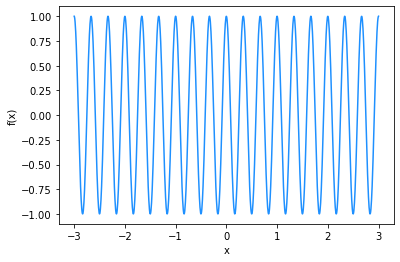

In [140]:
x = np.linspace(-3,3, 1000)
plt.figure()
plt.plot(x,np.cos(2*np.pi*x*3), alpha=1 , color='dodgerblue')
plt.xlabel('x')
plt.ylabel('f(x)')

## Part 1: Visualizing the Fourier Transforms of a Periodic and Non-periodic Function 

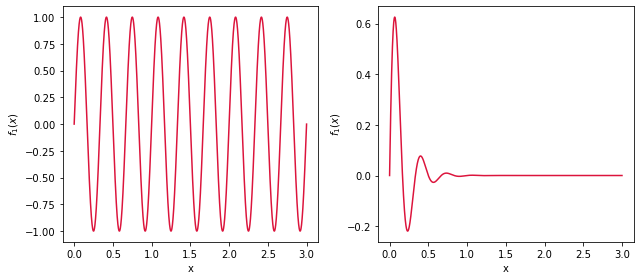

In [141]:
x = np.linspace(0,3, 10000)
fig, ax = plt.subplots(1,2, figsize=(9,4))

#plot function f1:
ax[0].plot(x,np.sin(6*np.pi*x), alpha=1 , color='crimson')

ax[0].set_xlabel('x')
ax[0].set_ylabel(r'$f_1(x)$')

#plot function f2:
ax[1].plot(x,(np.sin(6*np.pi*x)*np.exp(-2*np.pi* x)), alpha=1 , color='crimson')

ax[1].set_xlabel('x')
ax[1].set_ylabel(r'$f_1(x)$')

plt.tight_layout();

T2=2.8302830283028304


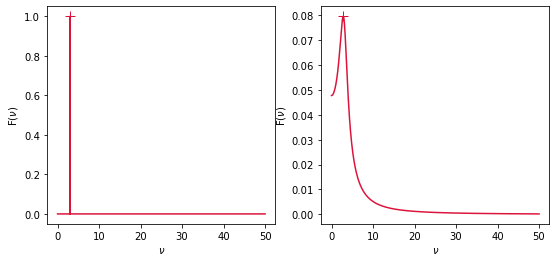

In [142]:
nu = np.linspace(0,50, 10000)

#we approximate FT1 with:
FT1 = np.zeros(10000)
FT1[np.where(np.abs(nu-(3))==np.min(np.abs(nu-3)))]=1

#plot FT1:
fig, ax = plt.subplots(1,2, figsize=(9,4))
ax[0].plot(nu, np.abs(FT1), color='crimson')
wh1 = np.argmax(np.abs(FT1))
ax[0].plot(nu[wh1], np.abs(FT1)[wh1], '+', color='crimson', markersize=10)
ax[0].set_xlabel(r'$\nu$')
ax[0].set_ylabel(r'F($\nu$)')

#plot FT2
FT2 = 6*np.pi/((2*np.pi+(2*np.pi*nu*1j))**2+(6*np.pi)**2)
ax[1].plot(nu, np.abs(FT2), color='crimson')
ax[1].set_xlabel(r'$\nu$')
ax[1].set_ylabel(r'F($\nu$)')

#plot maximum of FT2, extract Period of f2
wh2 = np.argmax(np.abs(FT2))
ax[1].plot(nu[wh2], np.abs(FT2)[wh2], '+', color='crimson', markersize=10)

print('T2='+str(nu[wh2]))

## Part 2: Recreate My Fourier Transform as the Limiting Function Figure 

In [197]:
def c_n(n, T):
    if n == 0:
        return 0
    else:
        return 1/(np.pi*n) * np.sin(np.pi*n/T)
    
c_n_list = []
nlist = np.linspace(-5, 5, 100)
for i in nlist:
    c_n_list.append(c_n(i, 1))
    


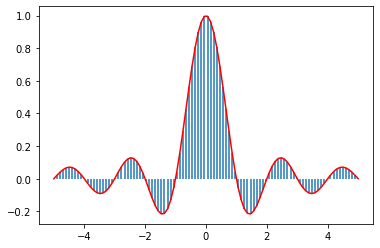

In [208]:
for i,c_n in enumerate(c_n_list):
    plt.vlines(nlist[i], 0, c_n)
    
plt.plot(nlist, np.sin(np.pi * nlist)/(np.pi * nlist), color = 'red')

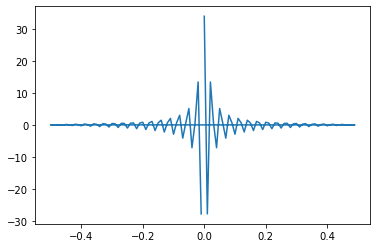

In [204]:
x = np.linspace(-1.5, 1.5, 100)
# plt.plot(x, np.piecewise(x, [np.abs(x) <= 0.5, np.abs(x) > 0.5], [lambda x: 1, lambda x: 0]))

t = np.piecewise(x, [np.abs(x) <= 0.5, np.abs(x) > 0.5], [lambda x: 1, lambda x: 0])

freq = np.fft.fftfreq(x.shape[-1])
sp = np.fft.fft(t)
plt.plot(freq, sp.real)

# Problem 3: Power Spectrum/ Power Spectral Densities 
## (in One and Two Dimensions)

## Part 1: Compute the PSD for a single Time Series

/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 1024 is greater than input length  = 1000, using nperseg = 1000
  warnings.warn('nperseg = {0:d} is greater than input length '


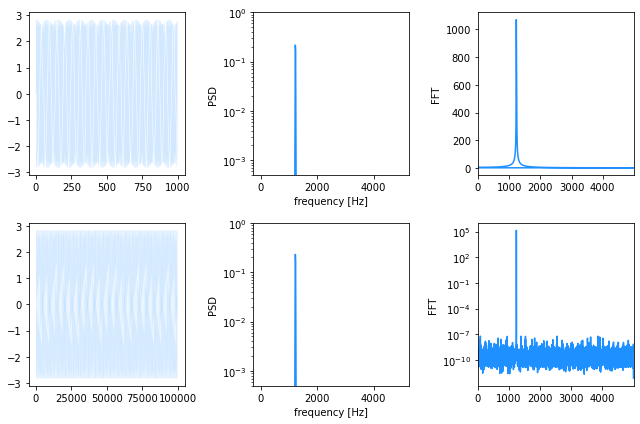

In [209]:
rng = np.random.default_rng()
fs = 10e3
N = 1e3
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
f, Pxx_den = signal.welch(x, fs, nperseg=1024)

fig, ax = plt.subplots(2,3, figsize=(9,6))
ax[0,1].semilogy(f, Pxx_den, color='dodgerblue')
ax[0,1].set_ylim([0.5e-3, 1])
ax[0,1].set_xlabel('frequency [Hz]')
ax[0,1].set_ylabel('PSD')
ax[0,2].set_ylabel('FFT')
ax[0,2].plot(np.fft.fftfreq(len(x), d=time[1]-time[0]), np.abs(np.fft.fft(x)), color='dodgerblue')
ax[0,2].set_xlim(0, np.max(np.fft.fftfreq(len(x), d=time[1]-time[0])))
ax[0,0].plot(x, color='dodgerblue', lw=0.1)

N = 1e5
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
f, Pxx_den = signal.welch(x, fs, nperseg=1024)

ax[1,1].semilogy(f, Pxx_den, color='dodgerblue')
ax[1,1].set_ylim([0.5e-3, 1])
ax[1,1].set_xlabel('frequency [Hz]')
ax[1,1].set_ylabel('PSD')
ax[1,2].set_ylabel('FFT')
ax[1,2].plot(np.fft.fftfreq(len(x), d=time[1]-time[0]), np.abs(np.fft.fft(x)), color='dodgerblue')
ax[1,2].set_yscale('log')
ax[1,2].set_xlim(0, np.max(np.fft.fftfreq(len(x), d=time[1]-time[0])))
ax[1,0].plot(x, color='dodgerblue', lw=0.01)
plt.tight_layout()

# Problem 4: Application to Real Data 

In [3]:
# pip install lightkurve 
from lightkurve import search_targetpixelfile
import lightkurve as lk

### Part a) Load a Kepler Lightcurve 

The lightkurve package contains a number of convenience methods for loading and working with light curve data. 

In [4]:
#Download KIC 3541346 lightcurve (flux VS time):
search_result = lk.search_lightcurve('KIC 3541346', author='Kepler', cadence='long')
print(search_result)

SearchResult containing 17 data products.

 #       mission      year author exptime  target_name  distance
                                     s                   arcsec 
--- ----------------- ---- ------ ------- ------------- --------
  0 Kepler Quarter 01 2009 Kepler    1800 kplr003541346      0.0
  1 Kepler Quarter 02 2009 Kepler    1800 kplr003541346      0.0
  2 Kepler Quarter 03 2009 Kepler    1800 kplr003541346      0.0
  3 Kepler Quarter 04 2010 Kepler    1800 kplr003541346      0.0
  4 Kepler Quarter 05 2010 Kepler    1800 kplr003541346      0.0
  5 Kepler Quarter 06 2010 Kepler    1800 kplr003541346      0.0
...               ...  ...    ...     ...           ...      ...
 10 Kepler Quarter 11 2012 Kepler    1800 kplr003541346      0.0
 11 Kepler Quarter 12 2012 Kepler    1800 kplr003541346      0.0
 12 Kepler Quarter 13 2012 Kepler    1800 kplr003541346      0.0
 13 Kepler Quarter 14 2012 Kepler    1800 kplr003541346      0.0
 14 Kepler Quarter 15 2013 Kepler    1800 kplr0

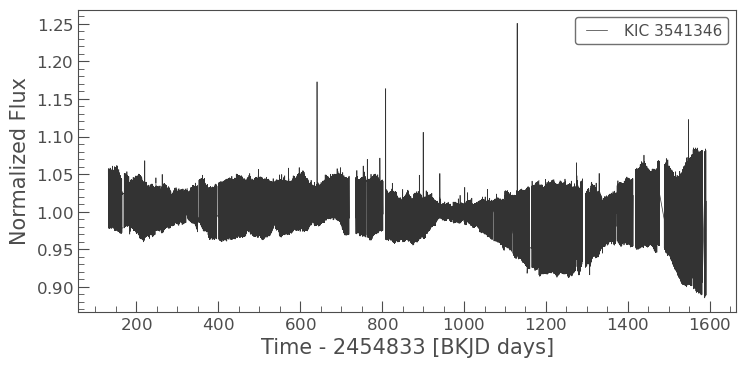

In [5]:
lc_collection = search_result.download_all()
#we stitch all the quarters together:
lc_stitched = lc_collection.stitch()
lc_stitched.plot();

### Part b) How to handle gaps in time series

The results we saw in the lecture all depend on even sampling of the time series and we will see more formally well posed methods for dealing with gaps in data in tomorrow's lectures. For now, we need to (evenly) fill in the gaps in the light curve that we downloaded so that we can apply our Fourier analysis tools. 

0.020433627534657717


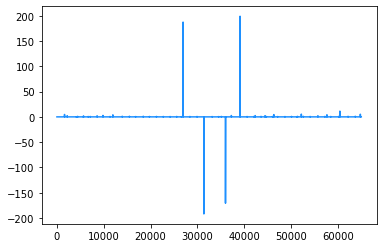

In [6]:
# Let's start by seeing where the largest gaps are
time = lc_stitched.time.to_value(format='jd')
flux = lc_stitched.flux.to_value()

plt.figure()
plt.plot(np.diff(time), color='dodgerblue')

print(np.median(np.diff(time)))

In [222]:
# looks like time differences > 0.02 should be considered gaps. 
# also need to resample the time series onto an *evenly* spaced grid

# 1) just resample to the nearest point and append zero 
# 2) generate an interpolating function and resample onto an even time grid

In [9]:
np.array(flux)

array([1.0558769, 1.0149399, 1.0073893, ..., 0.992627 , 1.0041382,
       1.0138036], dtype=float32)

In [10]:
import scipy.interpolate as interp 

In [61]:
interp_flux = interp.interp1d(time, np.array(flux))
new_flux = interp_flux(new_time)

new_flux[np.where(np.isnan(new_flux))] = np.mean(new_flux, where = ~np.isnan(new_flux))

In [62]:
np.mean(new_flux)

0.9992470456965359

In [34]:
new_time = np.linspace(np.min(time), np.max(time), len(time))

(0.0, 0.1)

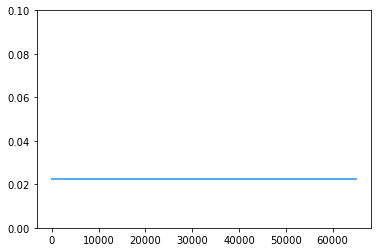

In [35]:
plt.figure()
plt.plot(np.diff(new_time), color='dodgerblue')

plt.ylim(0, 0.1)

Text(0, 0.5, 'Flux')

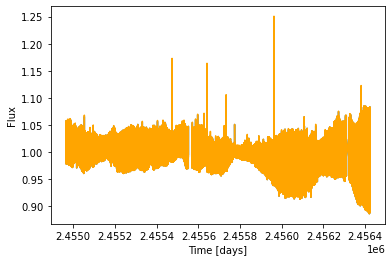

In [37]:
plt.figure()
plt.plot(new_time, new_flux, color='dodgerblue')
plt.plot(time, flux, color = 'orange')
plt.xlabel('Time [days]')
plt.ylabel('Flux')

65031
[6.85160844e-04 1.37032169e-03 2.05548253e-03 ... 2.22759493e+01
 2.22766345e+01 2.22773197e+01]
[6.49820346e+04+1.01108011e-12j 5.06523399e+00-2.22858160e+02j
 5.81131826e+01+5.55702380e+01j ... 5.51472514e+00-2.60682419e+01j
 5.81131826e+01-5.55702380e+01j 5.06523399e+00+2.22858160e+02j]
[[1.10036831]]
Period from FFT1 = 0.9087866186416578 days
Period from FFT2 = 0.9725437111531695 days


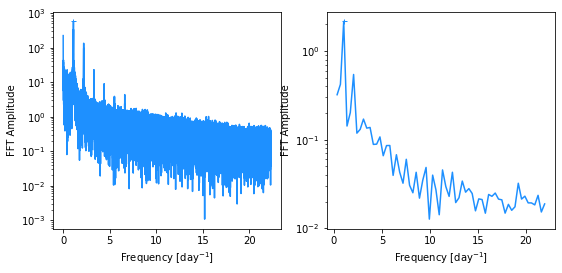

In [67]:
# ---Fill and excecute this cell---
time_res=(new_time[1]-new_time[0])#/len(time)
# Number of sample points
N = len(new_flux)

print(N)
# sample spacing
T = time_res

yf = np.fft.fft(new_flux)
xf = np.fft.fftfreq(N, T)[1:N//2]

print(xf)
print(yf)

fig, ax = plt.subplots(1,2, figsize=(9,4))
ax[0].set_yscale('log')
ax[0].plot(xf, np.abs(yf[1:N//2]), color='dodgerblue')

wh = np.argwhere((np.abs(yf[10:N//2])==np.max(np.abs(yf[10:N//2]))) )
frequency_max = xf[9:][wh]

print(frequency_max)

Period = 1/frequency_max[0][0]
ax[0].plot(frequency_max[0][0],np.abs(yf[10:N//2])[wh], '+', color='dodgerblue', markersize=5 )
ax[0].set_xlabel(r'Frequency [day$^{-1}$]')
ax[0].set_ylabel(r'FFT Amplitude')

print('Period from FFT1 = '+str(Period)+' days')

#compare with shorter time serie:
time2 = time[:130]
flux2 = flux[:130]
# Number of sample points
N = len(flux2)
# sample spacing
T = time_res

yf = np.fft.fft(flux2)
xf = np.fft.fftfreq(N, T)[1:N//2]

ax[1].set_yscale('log')
ax[1].plot(xf, np.abs(yf[1:N//2]), color='dodgerblue')

wh = np.argwhere((np.abs(yf[1:N//2])==np.max(np.abs(yf[1:N//2]))) )
frequency_max2 = xf[:][wh]
Period2 = 1/frequency_max2[0][0]
ax[1].plot(frequency_max2[0][0],np.abs(yf[1:N//2])[wh], '+', color='dodgerblue', markersize=5 )
ax[1].set_xlabel(r'Frequency [day$^{-1}$]')
ax[1].set_ylabel(r'FFT Amplitude')

print('Period from FFT2 = '+str(Period2)+' days')